# Feature Selection techniques

In [1]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 1. Univariante Selection

In [4]:
## sepearting independent features and dependent feature

## independent features
X= df.iloc[:,:-1]  ## selecting all row and col except last col

## dependent feature
y = df['price_range']

In [5]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [6]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:

from sklearn.feature_selection import SelectKBest
## using chisquare
from sklearn.feature_selection import chi2

In [8]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)  ## k is the no of top fearure u want to take
ordered_feature=ordered_rank_features.fit(X,y)

In [9]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000024214136558>)

In [10]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfscores

### higher the score more imp is that feature

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [12]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [14]:
## concatinating both the dataframe 
features_rank=pd.concat([dfcolumns,dfscores],axis=1)


In [15]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


### note ;-  higher the score more imp is that feature

In [16]:
## getting the top 10 featire based on score
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## 2. Feature Importance
    This technique gives you a score for each feature of your data,the higher the score more relevant it is

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
print(model.feature_importances_)

[0.06165327 0.02047881 0.03259003 0.01944659 0.03172112 0.01723227
 0.03534699 0.03306413 0.03662276 0.03274459 0.03226387 0.04606529
 0.0487327  0.39652643 0.03388104 0.03397355 0.03321962 0.01483097
 0.0193093  0.02029669]


In [19]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features

battery_power    0.061653
blue             0.020479
clock_speed      0.032590
dual_sim         0.019447
fc               0.031721
four_g           0.017232
int_memory       0.035347
m_dep            0.033064
mobile_wt        0.036623
n_cores          0.032745
pc               0.032264
px_height        0.046065
px_width         0.048733
ram              0.396526
sc_h             0.033881
sc_w             0.033974
talk_time        0.033220
three_g          0.014831
touch_screen     0.019309
wifi             0.020297
dtype: float64

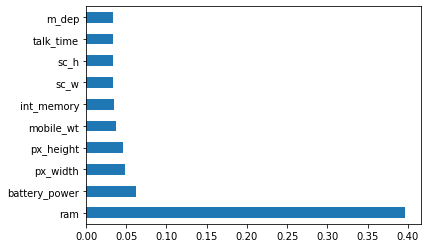

In [21]:

ranked_features.nlargest(10).plot(kind='barh')
plt.show()